<a href="https://colab.research.google.com/github/AREEBA-art552/EMAIL-SPAM-DETECTION-PROJECT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving sales_data.zip to sales_data.zip


In [3]:
import os
os.listdir()


['.config', 'sales_data.zip', 'sample_data']

In [4]:
import zipfile

with zipfile.ZipFile('sales_data.zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')  # Folder bana ke usme unzip karega

import os
os.listdir('data_folder')  # Dekho andar kya hai


['Advertising.csv']

In [5]:
import pandas as pd

df = pd.read_csv('data_folder/Advertising.csv')  # Exact file name likhna
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


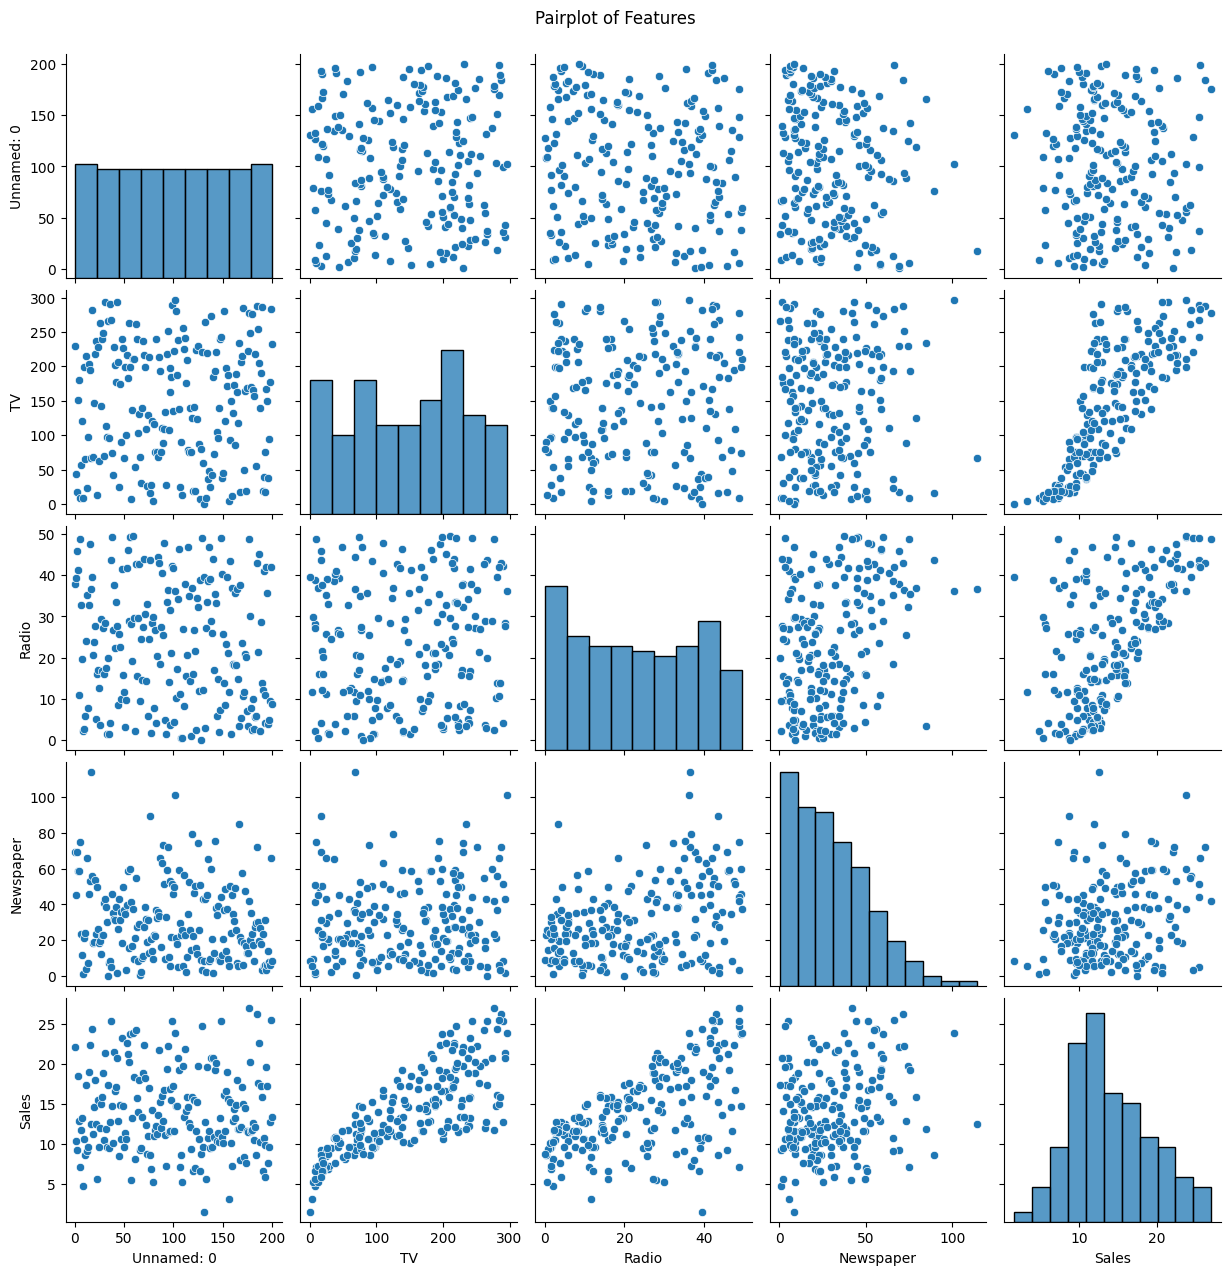

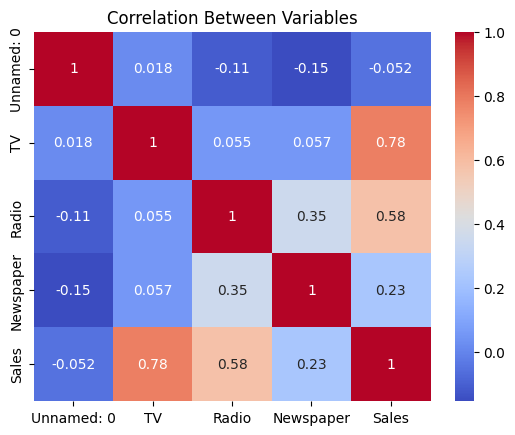

R^2 Score: 0.899438024100912
Mean Squared Error: 3.1740973539761033


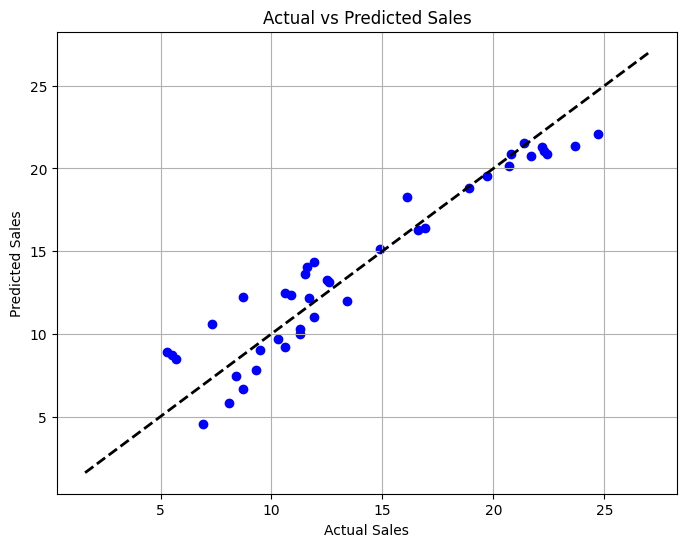

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Visualize relationships
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()

# Features (X) and Target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Visualize Predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
